In [142]:
import numpy as np
import pandas as pd

In [143]:
dm= pd.read_csv('/content/male_mentions_centrality.csv')

In [144]:
df= pd.read_csv('/content/female_mentions_centrality.csv')

In [145]:
df = df.drop('MOVIE NAME',axis=1)
dm = dm.drop('MOVIE NAME',axis=1)

In [146]:
df = df.drop('cast',axis=1)
dm = dm.drop('cast',axis=1)

In [147]:
df.head(2)

,mentions,total centrality,count,average centrality
0,2.0,222.500000,12.0,18.541667
1,11.0,868.166667,131.0,6.627226


In [148]:
dm.head(2)

,mentions,total centrality,count,average centrality
0,13.0,9219.2,131.0,70.375573
1,11.0,29.0,59.0,0.491525


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mentions            5043 non-null   float64
 1   total centrality    5043 non-null   float64
 2   count               5043 non-null   float64
 3   average centrality  5043 non-null   float64
dtypes: float64(4)
memory usage: 157.9 KB


In [150]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9353 entries, 0 to 9352
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mentions            9348 non-null   float64
 1   total centrality    9348 non-null   float64
 2   count               9348 non-null   float64
 3   average centrality  9348 non-null   float64
dtypes: float64(4)
memory usage: 292.4 KB


In [151]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

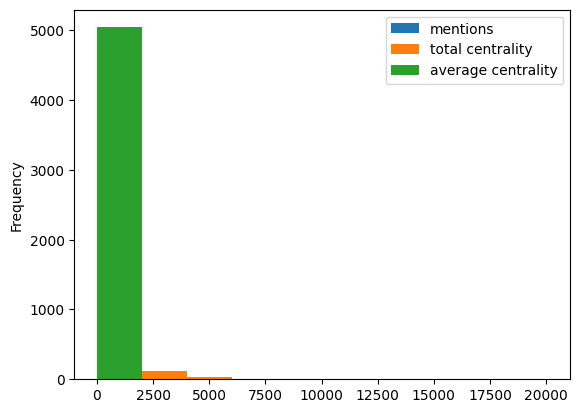

In [152]:
df.plot(kind='hist', x='count')

<Axes: ylabel='Frequency'>

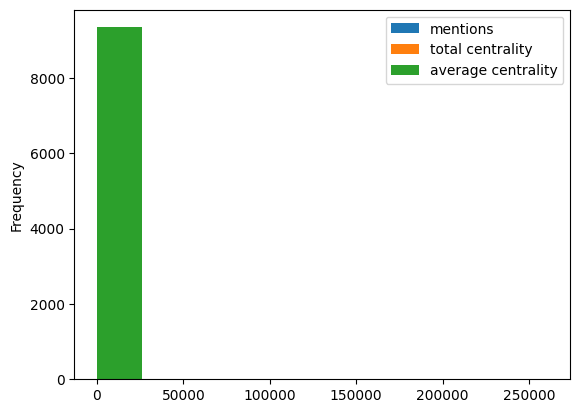

In [153]:
dm.plot(kind='hist',x='count')

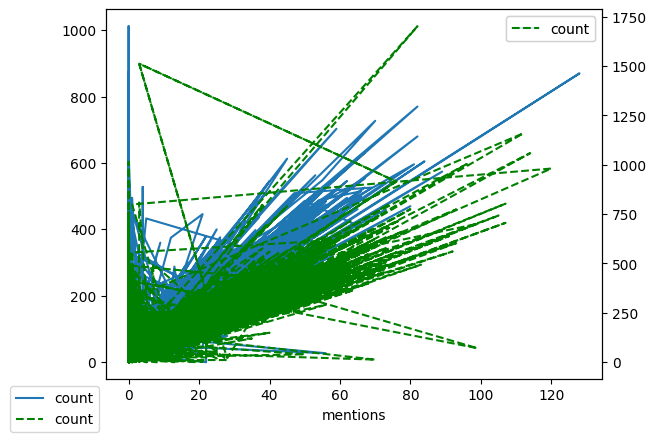

In [156]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
df.plot(x="mentions", y=["count"], ax=ax)
dm.plot(x="mentions", y=["count"], ax=ax2,ls= "--",c='green')
fig.legend(loc="upper right", bbox_to_anchor=(0,0), bbox_transform=ax.transAxes)

# data cleaning

In [157]:
df.isna().sum()

mentions              5
total centrality      5
count                 5
average centrality    5
dtype: int64

In [158]:
meanv=df['count'].median()
meanv

45.0

In [159]:
df['count'].fillna(value=meanv,inplace=True)
df.isna().sum()

mentions              5
total centrality      5
count                 0
average centrality    5
dtype: int64

In [161]:
df['mentions'].fillna(value=df['mentions'].mean(),inplace=True)
df.isna().sum()

mentions              0
total centrality      5
count                 0
average centrality    5
dtype: int64

In [162]:

df['total centrality'].fillna(value=df['total centrality'].mean(),inplace=True)
df.isna().sum()

mentions              0
total centrality      0
count                 0
average centrality    5
dtype: int64

In [163]:
df['average centrality'].fillna(value=df['average centrality'].median(),inplace=True)
df.isna().sum()

mentions              0
total centrality      0
count                 0
average centrality    0
dtype: int64

In [164]:
df.isna().sum()

mentions              0
total centrality      0
count                 0
average centrality    0
dtype: int64

In [165]:
X=df.drop('count',axis=1)
y=df['count']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [166]:
X_train

,mentions,total centrality,average centrality
4288,7.0,0.000000,0.000000
1258,1.0,197.000000,16.416667
3738,2.0,0.000000,0.000000
3515,0.0,853.500000,21.884615
1116,15.0,160.000000,1.649485
...,...,...,...
4426,0.0,315.000000,4.846154
466,7.0,106.000000,1.247059
3092,9.0,184.190476,2.361416
3772,11.0,264.000000,2.808511


# Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [168]:
lr.predict(X_test)
Y_pred = lr.predict(X_test)

In [169]:
Y_pred

array([ 14.61810894,  49.78532688,  64.81348323, ...,  52.11569388,
        83.73433431, 129.00932505])

In [170]:
cutoff = 0.7
y_pred_classes = np.zeros_like(Y_pred)
y_pred_classes[Y_pred > cutoff] = 1

In [171]:
y_test_classes = np.zeros_like(Y_pred)
y_test_classes[Y_test > cutoff] = 1

In [172]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[   0   32]
 [  21 1209]]


In [173]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_classes, y_pred_classes))

Accuracy :  0.9580031695721077


# input

In [174]:
features = np.array([[14.0,352.000000,2.444444]])

# output


In [175]:
Y_pred = lr.predict(features)
Y_pred =[Y_pred][0]
print(Y_pred)

[122.30616951]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [176]:
dm.isna().sum()

mentions              5
total centrality      5
count                 5
average centrality    5
dtype: int64

In [177]:
dm['mentions'].mode()[0]

0.0

In [178]:
dm['mentions']=dm['mentions'].fillna(value=dm['mentions'].mode()[0])
dm.isna().sum()

mentions              0
total centrality      5
count                 5
average centrality    5
dtype: int64

In [179]:
dm['total centrality'].median()

136.0

In [180]:
dm['total centrality']=dm['total centrality'].fillna(value=dm['total centrality'].median())
dm.isna().sum()

mentions              0
total centrality      0
count                 5
average centrality    5
dtype: int64

In [181]:
dm['count'].median()

51.0

In [182]:
dm['count']=dm['count'].fillna(value=dm['count'].median())
dm.isna().sum()

mentions              0
total centrality      0
count                 0
average centrality    5
dtype: int64

In [183]:
dm['average centrality'].mean()

4.810756396276102

In [184]:
dm['average centrality']=dm['average centrality'].fillna(value=dm['average centrality'].mean())
dm.isna().sum()

mentions              0
total centrality      0
count                 0
average centrality    0
dtype: int64

In [185]:
X=dm.drop('count',axis=1)
y=dm['count']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [186]:
X_train

,mentions,total centrality,average centrality
815,1.0,26.000000,3.714286
2131,15.0,649.000000,3.345361
7565,7.0,1018.030159,5.784262
3946,23.0,7486.180000,40.908087
6134,14.0,352.000000,2.444444
...,...,...,...
5734,6.0,656.000000,5.085271
5191,1.0,13.000000,1.625000
5390,3.0,439.833333,8.145062
860,1.0,54.000000,4.153846


In [187]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [188]:
lr.predict(X_test)
Y_pred = lr.predict(X_test)
Y_pred

array([200.79190727,  59.84242751, 174.82282633, ...,  53.46059916,
        35.56506361,  54.77068253])

In [189]:
cutoff = 0.7
y_pred_classes = np.zeros_like(Y_pred)
y_pred_classes[Y_pred > cutoff] = 1
y_test_classes = np.zeros_like(Y_pred)
y_test_classes[Y_test > cutoff] = 1

In [190]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[   0   78]
 [  26 2235]]


In [191]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_classes, y_pred_classes))

Accuracy :  0.9555365540829415


# Comparison

In [192]:
!pip install datacompy
import datacompy

In [193]:
compare = datacompy.Compare(df,dm,join_columns='mentions')

In [194]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        4  5048
1       df2        4  9353

Column Summary
--------------

Number of columns in common: 4
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: mentions
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 5,021
Number of rows in df1 but not in df2: 27
Number of rows in df2 but not in df1: 4,332

Number of rows with some compared columns unequal: 4,991
Number of rows with all compared columns equal: 30

Column Comparison
-----------------

Number of columns compared with some values unequal: 3
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 14,709

Columns with Unequal Values or Types
------------------------------------

               Column df1 dtype df2 dtype  # Unequal       Max 

# input


In [205]:
mention1=float(input("enter the mentions "))
tolcenter=float(input("enter the total centrality "))
avg=float(input("enter the average centrality "))

enter the mentions 13.0
enter the total centrality 9219.200000
enter the average centrality 70.375573


In [206]:
features = np.array([[mention1,tolcenter,avg]])

# output


In [207]:
Y_pred = lr.predict(features)
Y_pred =[Y_pred][0]
print(Y_pred)

[216.19072062]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
